# Identifying people in smoked room

### Imports :

In [18]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import random
from IPython.display import display

### Loading YOLOv5 Model :

In [19]:
model = torch.hub.load('ultralytics/yolov5','yolov5s',source='github')

Using cache found in C:\Users\devan/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-10 Python-3.11.3 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


### Detecting People :

In [31]:
def detect_people(image_path):
    # Load image
    img = Image.open(image_path)
    
    results = model(img)
    
    # Applying model(class 0 in COCO dataset is person)
    person_results = results.pandas().xyxy[0]
    person_results = person_results[person_results['class']== 0]
    
    return person_results

def process_images_in_folder(folder_path):

    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png','jpg','jpeg'))]
    
    # Creating dictionary to store results
    results_dict = {}
    
    # Process each image and store results
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        person_results = detect_people(image_path)
        results_dict[image_file] = person_results
    
    # Select a random image
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(folder_path, random_image_file)
    random_image_results = results_dict[random_image_file]
    
    # Display the random image with bounding boxes
    img = Image.open(random_image_path)
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(img)
    
    # Output the number of people detected in the random image
    num_people = len(random_image_results)
    print(f"{num_people} person(s) detected in the image:")
    display(img)  # Display the image

0 person(s) detected in the image:


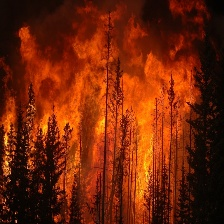

In [33]:
folder_path = 'fire' 
process_images_in_folder(folder_path)

In [32]:
def detect_people_conf_scores(image_path):
    # Load image
    img = Image.open(image_path)
    
    results = model(img)
    
    # Applying model(class 0 in COCO dataset is person)
    person_results = results.pandas().xyxy[0]
    person_results = person_results[person_results['class']== 0]
    
    # Check if any people were detected
    if person_results.empty:
        print(f"No people detected in the image '{image_path}'")
        return None
    else:
        num_people = len(person_results)
        print(f"{num_people} person(s) detected in the image '{image_path}'")
        
        # confidence scores
        confidence_scores = person_results['confidence'].tolist()
        print(f"Confidence scores: {confidence_scores}")
        
        return person_results

# Define a function to process all images in a folder
def detect_people_in_folder(folder_path):
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    # Process each image and detect people
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        detect_people_conf_scores(image_path)

In [34]:
folder_path = 'fire'  
detect_people_in_folder(folder_path)

No people detected in the image 'fire\fire_image_1025.jpg'
No people detected in the image 'fire\fire_image_1031.jpg'
No people detected in the image 'fire\fire_image_1047.jpg'
No people detected in the image 'fire\fire_image_1053.jpg'
No people detected in the image 'fire\fire_image_1076.jpg'
No people detected in the image 'fire\fire_image_11.jpg'
No people detected in the image 'fire\fire_image_1100.jpg'
No people detected in the image 'fire\fire_image_1104.jpg'
No people detected in the image 'fire\fire_image_1113.jpg'
No people detected in the image 'fire\fire_image_114.jpg'
No people detected in the image 'fire\fire_image_1141.jpg'
No people detected in the image 'fire\fire_image_1157.jpg'
No people detected in the image 'fire\fire_image_1169.jpg'
No people detected in the image 'fire\fire_image_1175.jpg'
No people detected in the image 'fire\fire_image_1176.jpg'
No people detected in the image 'fire\fire_image_1184.jpg'
No people detected in the image 'fire\fire_image_1187.jpg'


No people detected in the image 'fire\fire_image_2292.jpg'
No people detected in the image 'fire\fire_image_2299.jpg'
No people detected in the image 'fire\fire_image_2322.jpg'
No people detected in the image 'fire\fire_image_2336.jpg'
No people detected in the image 'fire\fire_image_2340.jpg'
No people detected in the image 'fire\fire_image_2347.jpg'
No people detected in the image 'fire\fire_image_2350.jpg'
No people detected in the image 'fire\fire_image_236.jpg'
No people detected in the image 'fire\fire_image_2361.jpg'
No people detected in the image 'fire\fire_image_2363.jpg'
No people detected in the image 'fire\fire_image_2368.jpg'
No people detected in the image 'fire\fire_image_2381.jpg'
No people detected in the image 'fire\fire_image_2385.jpg'
No people detected in the image 'fire\fire_image_245.jpg'
No people detected in the image 'fire\fire_image_250.jpg'
2 person(s) detected in the image 'fire\fire_image_254.jpg'
Confidence scores: [0.41327178478240967, 0.369776844978332